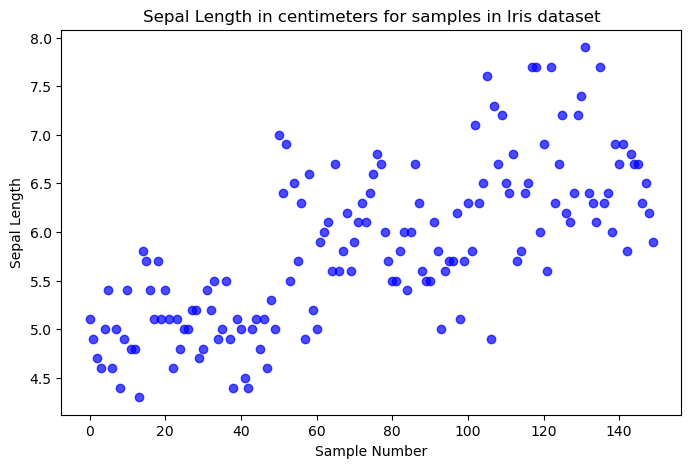

In [1]:
# 0: Te dane to 3 klasy roślin z rodziny Iris oraz 50 okazów każdej z klas, opisanych 
# poprzez wymiary odpowiednie ich części 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb
data = pd.read_csv("iris/iris.data", header=None)
data.columns = ["s-len", "s-width", "p-len", "p-width", "class"]

plt.figure(figsize=(8,5))
plt.scatter(range(150), data["s-len"], color="blue", alpha=0.7)
plt.title("Sepal Length in centimeters for samples in Iris dataset")
plt.xlabel("Sample Number")
plt.ylabel("Sepal Length")
plt.show()
# nie ma sensu łączyć kropek, bo dane są z 3 różnych klas oraz numery sampli
# nie oznaczają wcale czasu ani kolejności wykonywania pomiarów

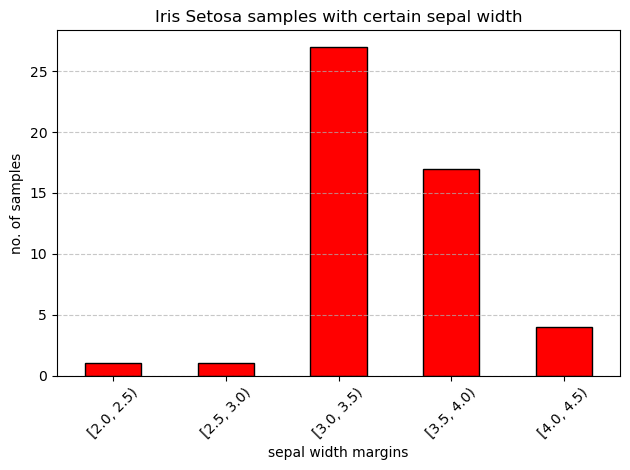

In [2]:
setosa = data[data["class"] == "Iris-setosa"]
intervals = [2.0, 2.5, 3.0, 3.5, 4.0, 4.5]
categories, _ = pd.cut(setosa["s-width"], bins=intervals, right=False, retbins=True)
counts = categories.value_counts(sort=False)    
counts.plot(kind='bar', color='red', edgecolor='black')
plt.title("Iris Setosa samples with certain sepal width")
plt.xlabel("sepal width margins")
plt.ylabel("no. of samples")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
# Histogram pokazuje rozkład ciągłej zmiennej, a to co tutaj to wykres słupkowy
# histogram można poznać po tym, że jest jeden słupek bezpośrednio po drugim


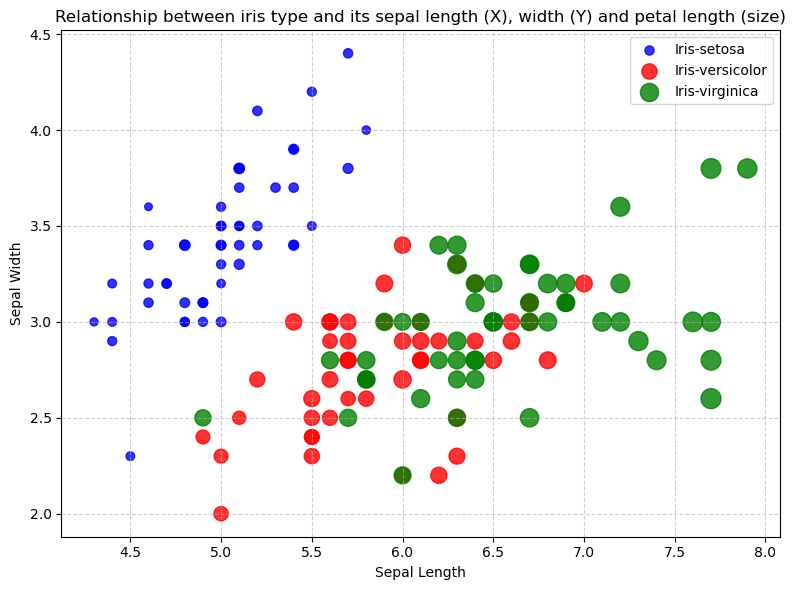

In [3]:
plt.figure(figsize=(8,6))
types_colors = {
    "Iris-setosa" : "blue",
    "Iris-versicolor" : "red",
    "Iris-virginica" : "green"
}

for kind, color in types_colors.items():
    subset = data[data["class"] == kind]
    plt.scatter(
        subset["s-len"],           # X
        subset["s-width"],         # Y
        s=subset["p-len"] * 30,    # size
        color=color,
        alpha=0.8,
        label=kind
    )

plt.title("Relationship between iris type and its sepal length (X), width (Y) and petal length (size)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Nie ma sensu łączyć kropek, Dzięki temu wykresowi ładnie widać, że Iris setosa ma 
# zwykle mniejszą Sepal length, ale większą Sepal width przez co tworzy swoją "grupe" 
# na wykresie. Ma też mniejszy petal length niż pozostałe dwa rodzaje 


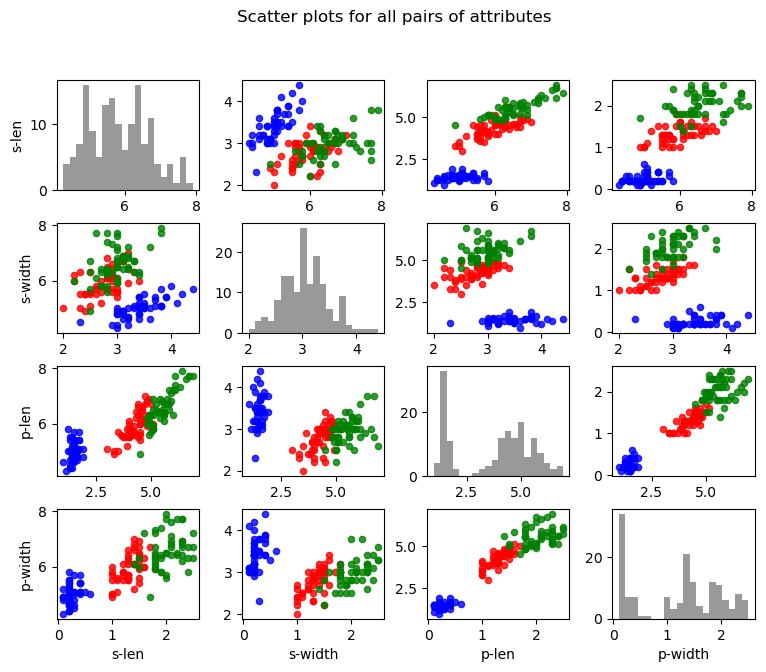

In [4]:
attributes = ["s-len", "s-width", "p-len", "p-width"]
types_colors = {
    "Iris-setosa" : "blue",
    "Iris-versicolor" : "red",
    "Iris-virginica" : "green"
}
fig, axes = plt.subplots(4, 4, figsize=(9, 7))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
for i, a1 in enumerate(attributes): 
    for j, a2 in enumerate(attributes):
        ax = axes[i, j]
        if i == j: # diagonal -> only one attribute
            ax.hist(data[a1], bins=20, color='gray', alpha=0.8)
        else:
            for kind, color in types_colors.items():
                subset = data[data["class"] == kind]
                ax.scatter(subset[a1], subset[a2], color=color, alpha=0.8, s=20)
        #ax.set_xlabel(a1 + str(i) + str(j))
        #ax.set_ylabel(a2 + str(i) + str(j))
        if i == 3:
            ax.set_xlabel(a2)
        if j == 0:
            ax.set_ylabel(a1)
plt.suptitle("Scatter plots for all pairs of attributes")
plt.show()

/var/folders/pt/120626514sj_lgs4_d10nxjm0000gn/T/ipykernel_59046/1203302847.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(
/var/folders/pt/120626514sj_lgs4_d10nxjm0000gn/T/ipykernel_59046/1203302847.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(
/var/folders/pt/120626514sj_lgs4_d10nxjm0000gn/T/ipykernel_59046/1203302847.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(
/var/folders/pt/120626514sj_lgs4_d10nxjm0000gn/T/ipykernel_59046/1203302847.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated

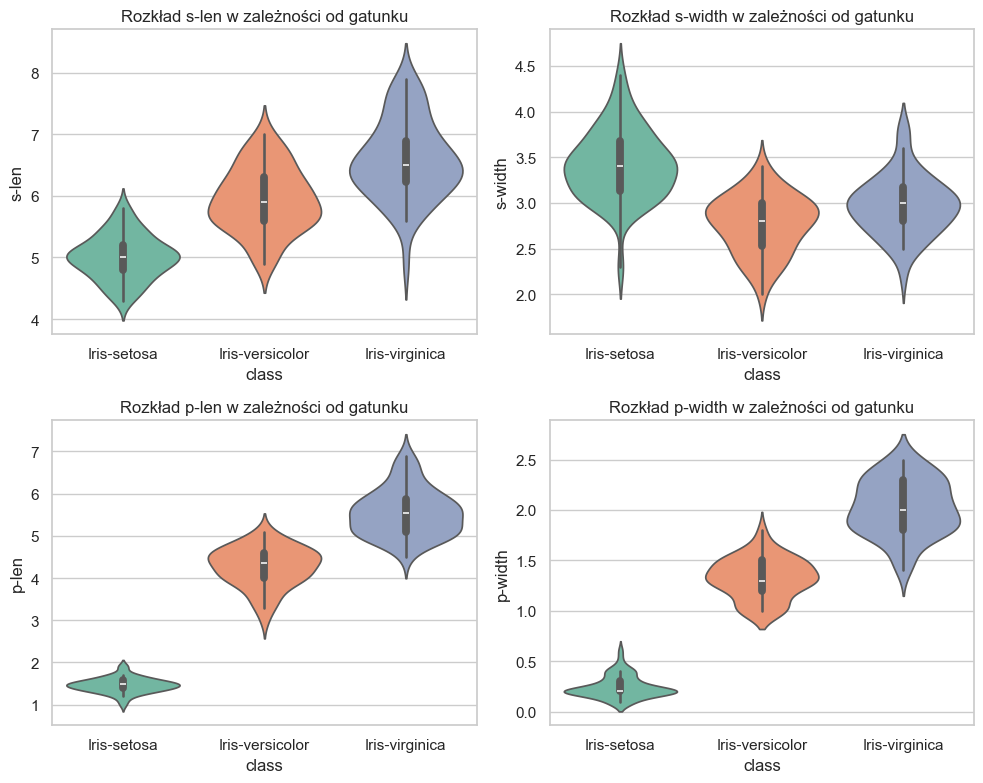

In [5]:
sb.set_theme(style="whitegrid")
_, axes = plt.subplots(2, 2, figsize=(10, 8))
attributes = ["s-len", "s-width", "p-len", "p-width"]

for ax, attribute in zip(axes.flat, attributes):
    sb.violinplot(
        data=data,
        x="class",
        y=attribute,
        inner="box",       
        palette="Set2",
        ax=ax
    )
    ax.set_title(f"Rozkład {attribute} w zależności od gatunku")

plt.tight_layout()
plt.show()
# Wykres skrzypcowy - grubość skrzypiec oznacza jak wiele danych przypada na te wartość
# Biała linia to mediana i 2 kwartyl 
# pierwszy kwartyl jest poniżej grubej kreski i oznacza że poniżej jest 25% danych
# trzeci kwartyl jest powyżej grubej kreski i oznacza że poniżje jest 75% danych
